# Import necessary libraries

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates


## Load necessary data

In [2]:
csv_data = pd.read_csv('data/clean_data/final_data.csv')
final_data = csv_data[csv_data['Year'] >= 2000]

combined_data = pd.read_csv('data/clean_data/combined_data.csv')

with open('data/clean_data/encoding_mappings.json', 'r') as fp:
    encoding_mappings = json.load(fp)

combined_data.info()

C:\Users\User\AppData\Local\Temp\ipykernel_20836\762078624.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv('data/clean_data/combined_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634002 entries, 0 to 634001
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                634002 non-null  object 
 1   town                 634002 non-null  object 
 2   flat_type            634002 non-null  object 
 3   storey_range         634002 non-null  object 
 4   floor_area_sqm       634002 non-null  float64
 5   flat_model           634002 non-null  object 
 6   lease_commence_date  634002 non-null  int64  
 7   resale_price         634002 non-null  float64
 8   remaining_lease      212148 non-null  object 
 9   Year                 634002 non-null  int64  
 10  Month                634002 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 53.2+ MB


## Reverse the encoded dataset such that we can visualise the data in exploratory analysis

In [3]:
reversed_town_encoding = {v: k for k, v in encoding_mappings['town'].items()}
reversed_flat_type_encoding = {v: k for k, v in encoding_mappings['flat_type'].items()}
reversed_flat_model_encoding = {v: k for k, v in encoding_mappings['flat_model'].items()}

decoded_data = final_data.copy()

decoded_data['town'] = decoded_data['town'].map(reversed_town_encoding)
decoded_data['flat_type'] = decoded_data['flat_type'].map(reversed_flat_type_encoding)
decoded_data['flat_model'] = decoded_data['flat_model'].map(reversed_flat_model_encoding)

In [4]:
decoded_data.describe()

,Year,lease_commence_date,floor_area_sqm,average_storey,resale_price
count,634002.000000,634002.000000,634002.000000,634002.000000,6.340020e+05
mean,2010.645559,1990.479825,96.755440,7.900997,3.639877e+05
std,7.290257,11.396947,25.043239,5.062892,1.657956e+05
min,2000.000000,1966.000000,28.000000,2.000000,2.800000e+04
25%,2004.000000,1983.000000,74.000000,5.000000,2.400000e+05
50%,2010.000000,1988.000000,96.000000,8.000000,3.400000e+05
75%,2017.000000,1998.000000,113.000000,11.000000,4.520000e+05
max,2024.000000,2022.000000,297.000000,50.000000,1.568888e+06


## Show the spread of numeric features against Resale price 

Calculate skewness of the dataset

floor_area_sqm         0.295712
lease_commence_date    0.374158
resale_price           1.023268
average_storey         1.425422
dtype: float64


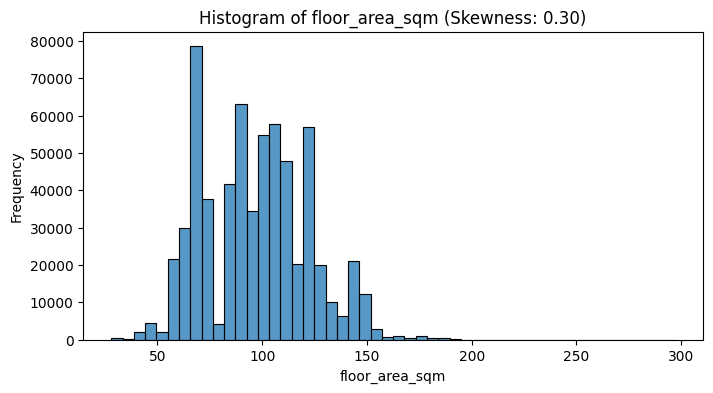

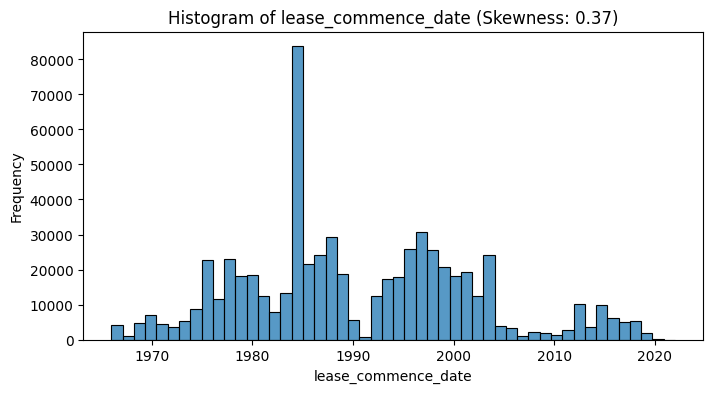

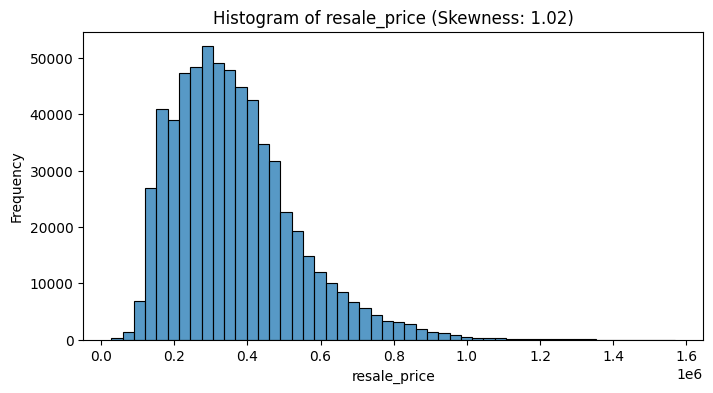

In [5]:
skewness_values = decoded_data[['floor_area_sqm', 'lease_commence_date','resale_price','average_storey']].skew()

print(skewness_values)

columns = ['floor_area_sqm', 'lease_commence_date','resale_price']

for col in columns:
    plt.figure(figsize=(8, 4))
    sb.histplot(final_data[col],bins=50, kde=False)
    plt.title(f'Histogram of {col} (Skewness: {skewness_values[col]:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Finding correlation of all features and target in a heat map

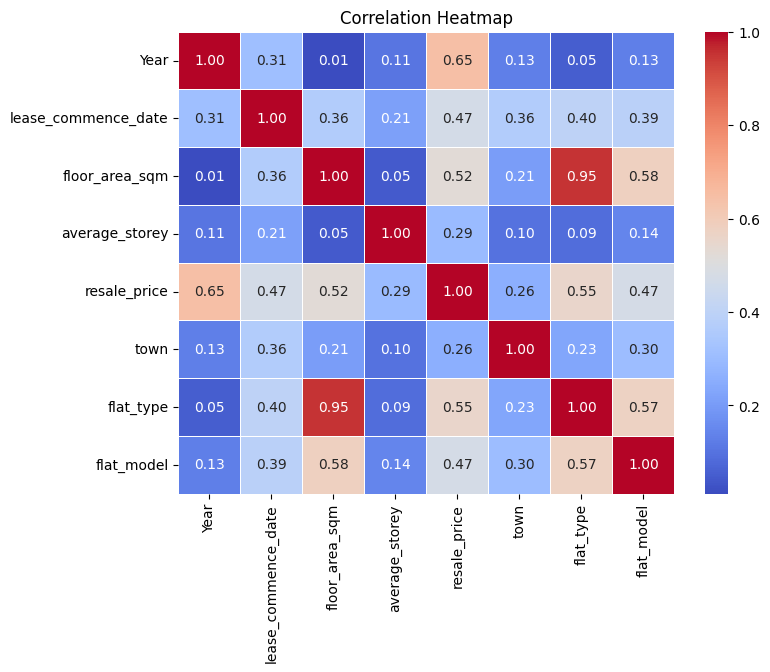

In [6]:
corr = final_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)  

plt.show()

## Visualise changes in resale price through the year

Attempt to spot any seasonal trend

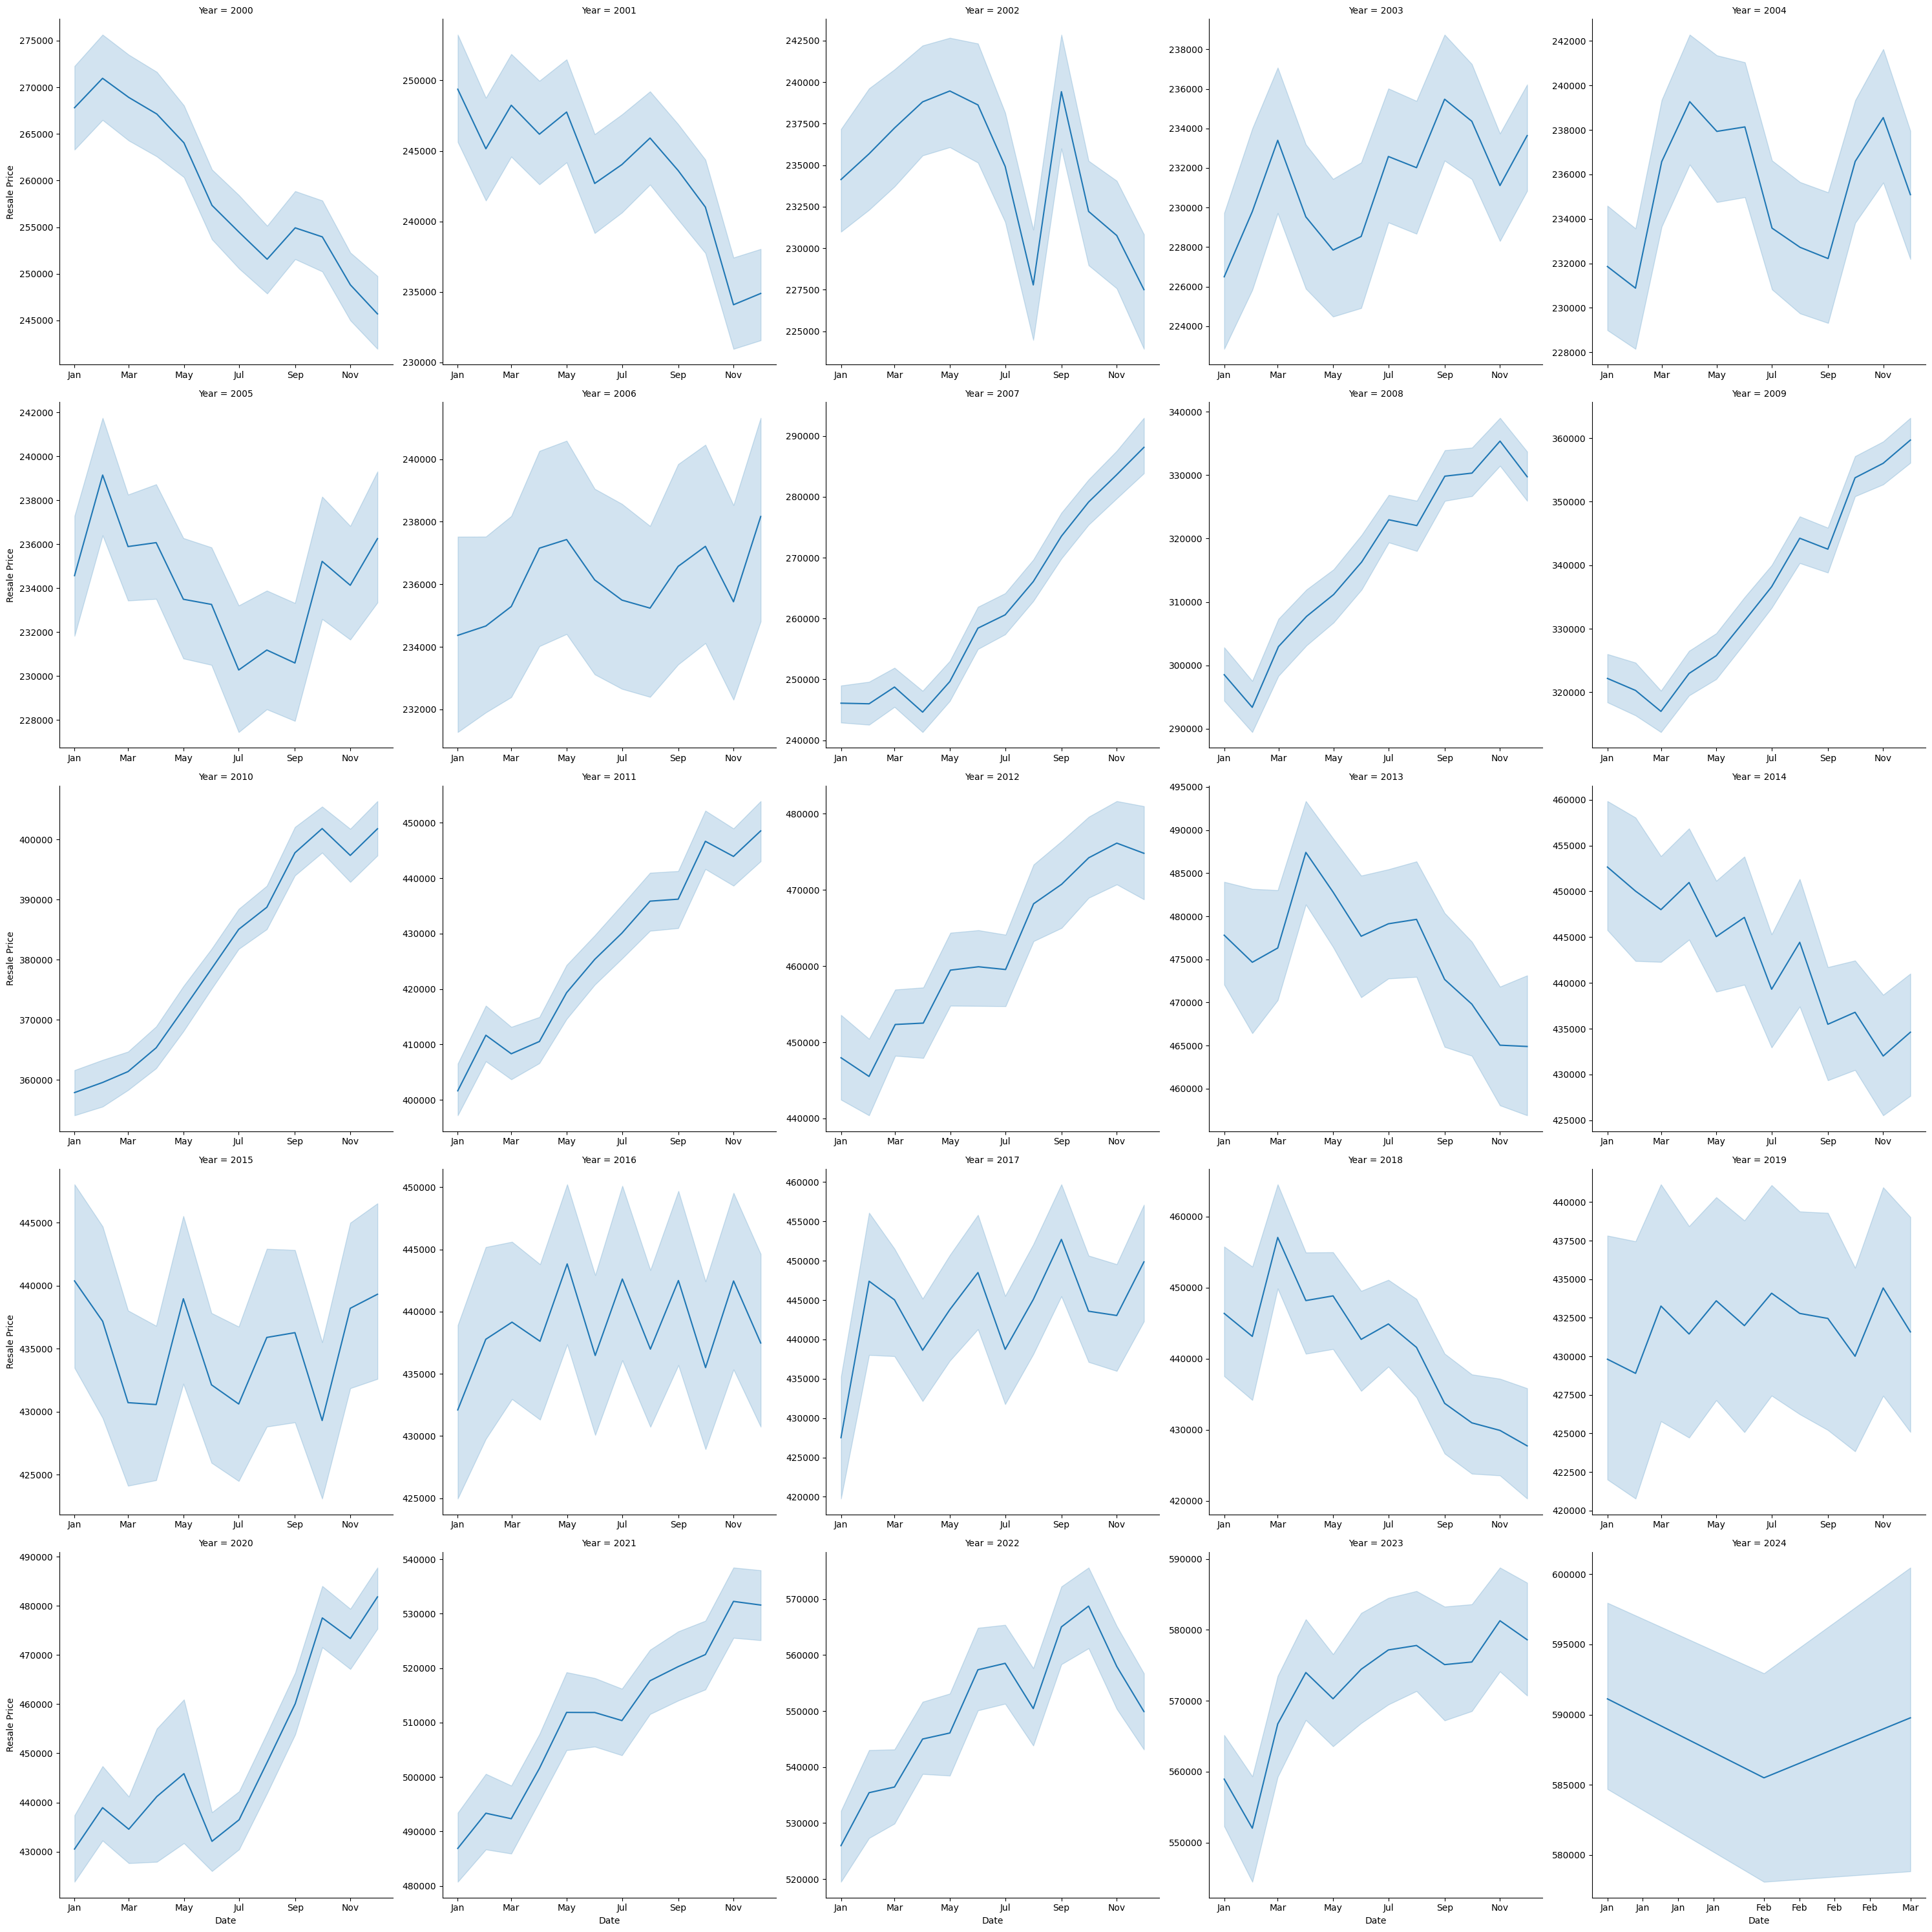

In [7]:
combined_data['date'] = pd.to_datetime(combined_data[['Year', 'Month']].assign(day=1))

g = sb.FacetGrid(combined_data, col="Year", col_wrap=5, height=6,sharex=False, sharey=False)
g.map(sb.lineplot, "date", "resale_price")
g.set_axis_labels("Date", "Resale Price")

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

## Visualise all categorical data and their effects on resale price

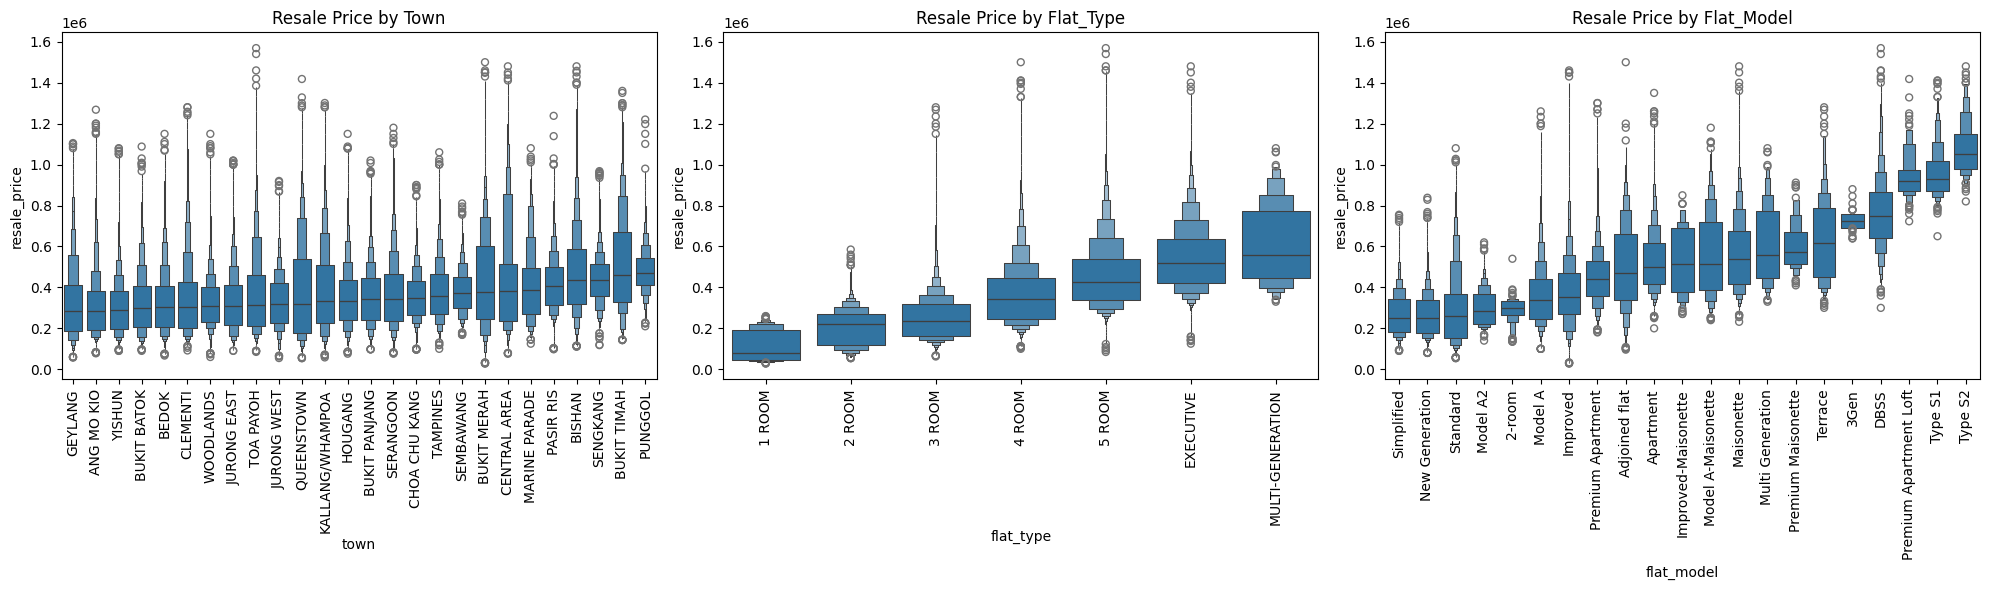

In [11]:
plt.figure(figsize=(20, 6))
ordered_categories_list = []

for column in ['town', 'flat_type', 'flat_model']:
    ordered_categories = decoded_data.groupby(column)['resale_price'].median().sort_values().index
    ordered_categories_list.append(ordered_categories)

for i, column in enumerate(['town', 'flat_type', 'flat_model']):
    plt.subplot(1, 3, i+1)
    
    sb.boxenplot(
        data=decoded_data,
        x=column,
        y='resale_price',
        order=ordered_categories_list[i]  
    )
    
    plt.xticks(rotation=90)
    
    plt.title(f'Resale Price by {column.title()}')

plt.tight_layout()
plt.show()

## Visualise Resale Price vs. Floor Area by Flat Type

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


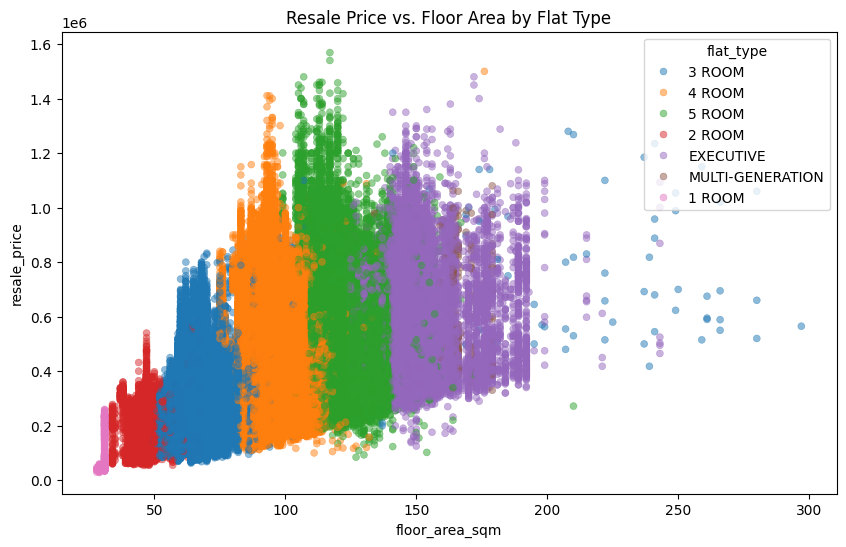

In [9]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='floor_area_sqm', y='resale_price', hue='flat_type', data=decoded_data, alpha = 0.5,
                s=25, edgecolor = None)
plt.title('Resale Price vs. Floor Area by Flat Type')
plt.show()

## Visualise all numerical features and their effects on resale price

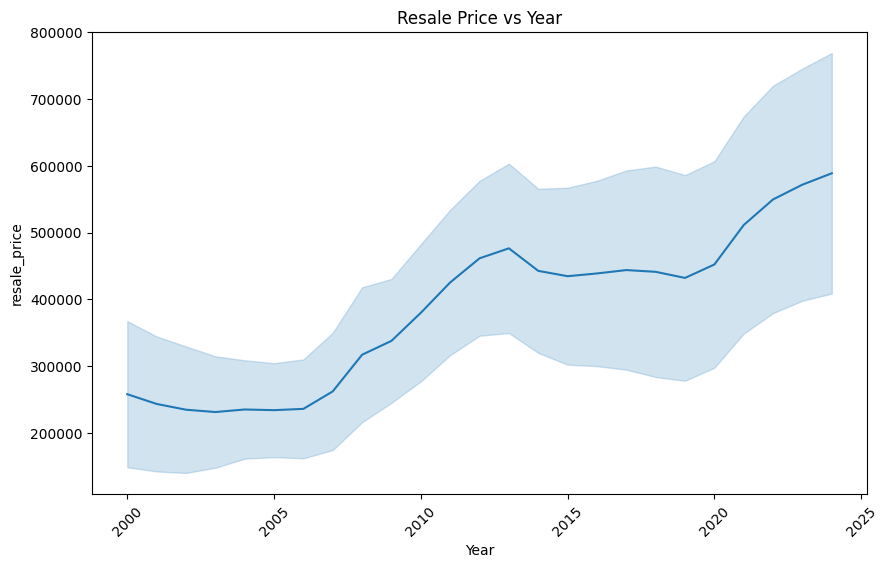

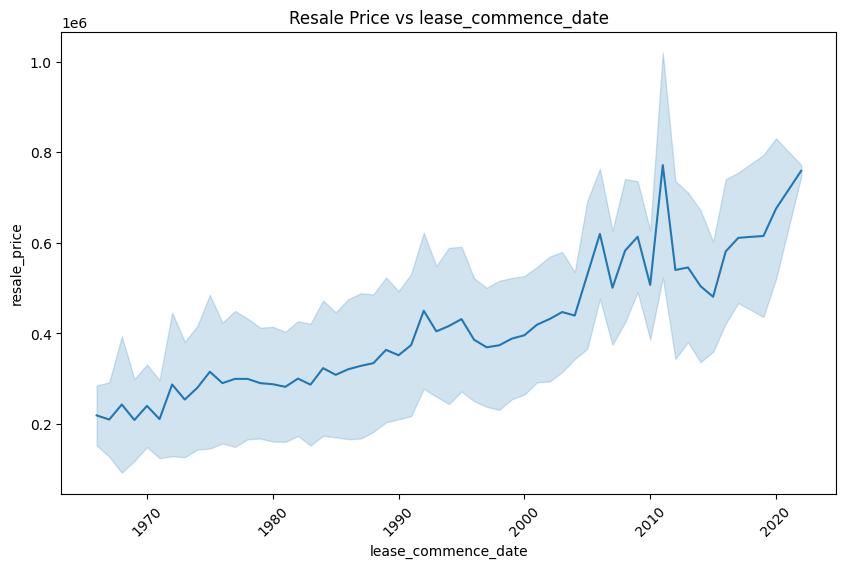

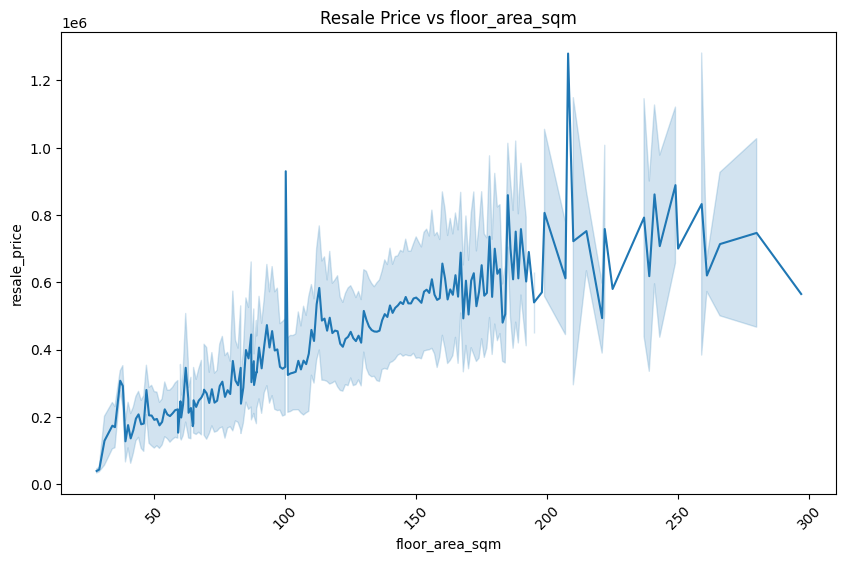

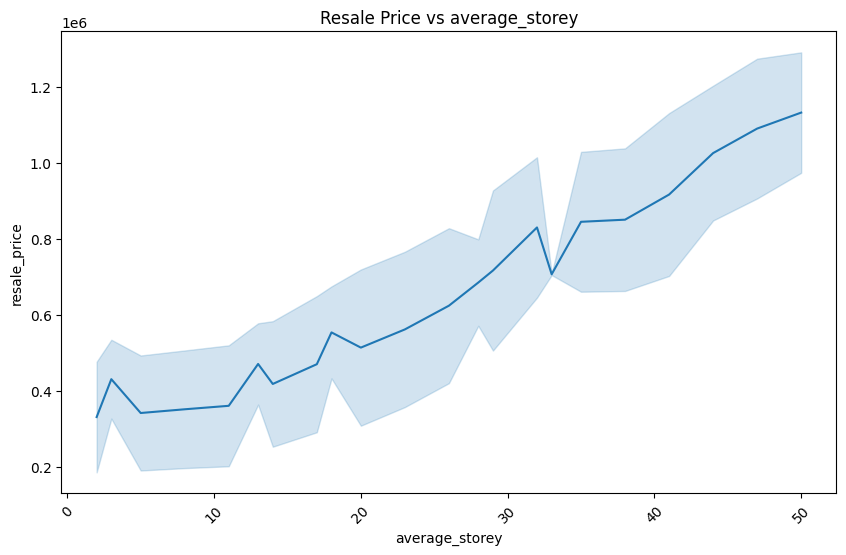

In [10]:
for column in ['Year', 'lease_commence_date', 'floor_area_sqm', 'average_storey']:
    plt.figure(figsize=(10, 6))  
    plot = sb.lineplot(data=final_data, x=column, y='resale_price',errorbar = 'sd')
    plt.title(f'Resale Price vs {column}')  
    plt.xticks(rotation=45)  
    plt.show()  